# Using Decision Trees With Scikit-Learn

The decision tree algorithm is a supervised learning algorithm -- we first construct the tree with historical data, and then use it to predict an outcome. One of the major advantages of decision trees is that they can pick up nonlinear interactions between variables in the data that linear regression can't.


The data is income data from the 1994 census, and contains information on an individual's marital status, age, type of work, and more. The target column, or what we want to predict, is whether individuals make less than or equal to 50k a year, or more than 50k a year.

![](https://1.bp.blogspot.com/_iJyjQ6GZMcE/R8TzdU148XI/AAAAAAAAABY/bkjLU0VOouY/S660/dec1.bmp)


Resources:
- [Download the data from the University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Adult).

- [Check out my project in Jupyter Notebook in which I build Decision Trees from scratch.](https://github.com/SuruchiFialoke/MachineLearning/blob/master/RandomForest/Intro_DecisionTree.ipynb)

- [View this project on DataQuest](https://www.dataquest.io/m/92/applying-decision-trees/2/using-decision-trees-with-scikit-learn)


## Understanding the data

Before we get started with decision trees, we need to convert the categorical variables in our data set to numeric variables. This involves assigning a number to each category label, then converting all of the labels in a column to the corresponding numbers.
One strategy is to convert the columns to a categorical type. Under this approach, pandas will display the labels as strings, but internally store them as numbers so we can do computations with them.

Here are some of the columns from the [dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, 

Steps:

**Step 1: Identify the columns that could be useful **   

```python 
columns_of_interest = ["age", "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country", 'high_income']
```

**Step 2: Convert categorical columns to their numeric values**

```python 
categorical_columns = [ "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "high_income"]
```

** Step 3: Identify features and target **. Store the names of columns to train in list called 'features' and the name of the target column 'high_income' in variable called target.


In [23]:
## 1. Step 1: Identify the columns that could be useful ##
import pandas as pd

# Set index_col to False to avoid pandas thinking that the first column is row indexes (it's age).
income = pd.read_csv("income.csv", index_col=False)
columns_of_interest = ["age", "workclass", "education_num", "marital_status", "occupation",\
                       "relationship", "race", "sex", "hours_per_week", "native_country", 'high_income']

income = income.loc[:, columns_of_interest]
income.head(2)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,high_income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K


In [24]:
## Step 2: Convert categorical columns to their numeric values ##

features_categorical = [ "workclass", "education_num", "marital_status", "occupation",\
                        "relationship", "race", "sex","native_country", "high_income"]
for c in features_categorical:
    income[c] = pd.Categorical(income[c]).codes

income.head(2)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,high_income
0,39,7,12,4,1,1,4,1,40,39,0
1,50,6,12,2,4,0,4,1,13,39,0


In [25]:
## Step 3: Identify features and target ##

features = ["age", "workclass", "education_num", "marital_status", "occupation",\
            "relationship", "race", "sex", "hours_per_week", "native_country"]
target = 'high_income'

## Decision Trees With Scikit-Learn

We can use the scikit-learn package to fit a decision tree. We use the DecisionTreeClassifier class for classification problems, and DecisionTreeRegressor for regression problems. The sklearn.tree package includes both of these classes.

In this case, we're predicting a binary outcome, so we'll use a classifier.

step 1: Instantiate the classifier

step 2: Create training and testing sets

step 3: Fit the training data to the classifier

step 4: Make predictions

step 5: Check accuracy on test set using AUC

step 6: Check for overfitting 

### Step 1: Instantiate the classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier(random_state=1)


### Step 2: Train-Test Split

In [28]:
import numpy as np
import math

# Set a random seed so the shuffle is the same every time
np.random.seed(1)

# Shuffle the rows  
# This permutes the index randomly using numpy.random.permutation
# Then, it reindexes the dataframe with the result
# The net effect is to put the rows into random order
income = income.reindex(np.random.permutation(income.index))

# 80% to train and 20% to test
train_max_row = math.floor(income.shape[0] * .8)

train = income.iloc[:train_max_row, :]
test = income.iloc[train_max_row:, :]


### Step 3: Fit the Model

In [30]:
# Fit the model

clf.fit(train[features], train[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

### Step 4: Make predictions on the Test Set

In [33]:
# Making predictions
predictions = clf.predict(test[features])
predictions[:2]

array([0, 0], dtype=int8)

### Step 5: Check Accuracy on test set using AUC

While there are many methods for evaluating error with classification, we'll use [AUC obtained from ROC curve](http://gim.unmc.edu/dxtests/roc3.htm). AUC ranges from 0 to 1, so it's ideal for binary classification. The higher the AUC, the more accurate our predictions. We can compute AUC with the roc_auc_score function from sklearn.metrics. This function takes in two parameters:

y_true: true labels

y_score: predicted labels


In [36]:
from sklearn.metrics import roc_auc_score

test_auc = roc_auc_score(test[target], predictions)

print(test_auc)

0.693465632475


### Step 6: Check for overfitting
The AUC for the predictions on the testing set is about .694 which is not very good. Let's compare this against the AUC for predictions on the training set to see if the model is overfitting.

In [37]:
train_predictions = clf.predict(train[columns])

train_auc = roc_auc_score(train[target], train_predictions)

print(train_auc)

0.947124450144


Our AUC on the training set was .947, and the AUC on the test set was .694. There's no hard and fast rule on when overfitting is occurring, but our model is predicting the training set much better than the test set. Splitting the data into training and testing sets helps us detect and fix it. Trees overfit when they have too much depth and make overly complex rules that match the training data, but aren't able to generalize well to new data. The deeper a tree is, the worse it typically performs on new data.




## Optimize Overfitting With A Shallower Tree

There are three main ways to combat overfitting:

1. Restrict the depth of the tree while we're building it.
2. "Prune" the tree after we build it to remove unnecessary leaves.
3. Use ensembling to blend the predictions of many trees.

In this project we will focus on the first method

### Restrict the depth of the tree

We can restrict tree depth by adding a few parameters when we initialize the DecisionTreeClassifier class:

- max_depth - Globally restricts how deep the tree can go
- min_samples_split - The minimum number of rows a node should have before it can be split; if this is set to 2, for example, then nodes with 2 rows won't be split, and will become leaves instead
- min_samples_leaf - The minimum number of rows a leaf must have
- min_weight_fraction_leaf - The fraction of input rows a leaf must have
- max_leaf_nodes - The maximum number of total leaves; this will cap the count of leaf nodes as the tree is being built
Some of these parameters aren't compatible, however. For example, we can't use max_depth and max_leaf_nodes together.

In [98]:
def get_aucs(max_depth):
    # Decision trees model with max_depth 
    clf = DecisionTreeClassifier(random_state=1, max_depth=max_depth)

    clf.fit(train[columns], train[target])

    # Test AUC
    predictions = clf.predict(test[columns])
    test_auc = roc_auc_score(test[target], predictions)

    # Train AUC
    predictions_train = clf.predict(train[columns])
    train_auc = roc_auc_score(train[target], predictions_train)
    
    return test_auc, train_auc

depth_values = np.arange(2, 40)
auc_values = np.zeros((len(depth_values), 3))
for i, val in enumerate(depth_values):
    test_auc, train_auc = get_aucs(val)
    auc_values[i, 0]  = val
    auc_values[i, 1]  = test_auc
    auc_values[i, 2]  = train_auc

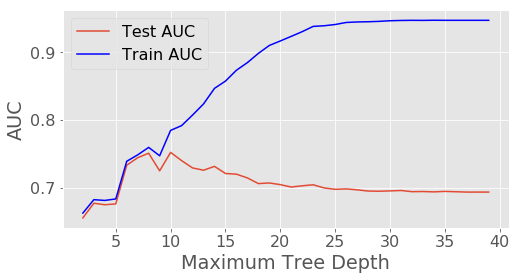

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(8,4))
plt.plot(auc_values[:,0], auc_values[:,1], label='Test AUC') 
plt.plot(auc_values[:,0], auc_values[:,2], color='b', label='Train AUC')
plt.legend()
plt.xlabel('Maximum Tree Depth')
plt.ylabel('AUC')

plt.show()

For smaller values of tree depth (< 6), we have comparable values of AUC for both test and training, smaller the value the worse the accuracy. This is underfitting, suggesting that our model is not complex enough for the features. However for larger values the models does very well on the training set but not as well on the test set due to over-fitting. Around tree-depth of 10, we have optimal performance, largest value of AUC where the performance of test and training data are similar.  

#### The Bias-Variance Tradeoff

By artificially restricting the depth of our tree, we prevent it from creating a model that's complex enough to correctly categorize some of the rows. If we don't perform the artificial restrictions, however, the tree becomes too complex, fits quirks in the data that only exist in the training set, and doesn't generalize to new data.

Imagine that we take a random sample of the training data and create many models.

- High bias can cause underfitting -- if a model is consistently failing to predict the correct value, it may be that it's too simple to model the data faithfully.

- High variance can cause overfitting. If a model varies its predictions significantly based on small changes in the input data, then it's likely fitting itself to quirks in the training data, rather than making a generalizable model.

We call this the bias-variance tradeoff because decreasing one characteristic will usually increase the other. 

## Advantages and Disadvantages of using Decision Trees

Let's go over the main advantages and disadvantages of using decision trees. The main advantages of using decision trees is that they're:

- Easy to interpret
- Relatively fast to fit and make predictions
- Able to handle multiple types of data
- Able to pick up nonlinearities in data, and usually fairly accurate

The main disadvantage of using decision trees is their tendency to overfit.

Decision trees are a good choice for tasks where it's important to be able to interpret and convey why the algorithm is doing what it's doing.

The most powerful way to reduce decision tree overfitting is to create ensembles of trees. The random forest algorithm is a popular choice for doing this. In cases where prediction accuracy is the most important consideration, random forests usually perform better.

